# Laboratory 1


### Configuration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interface

[Available colors](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Available bullet points](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Example

<IPython.core.display.Javascript object>


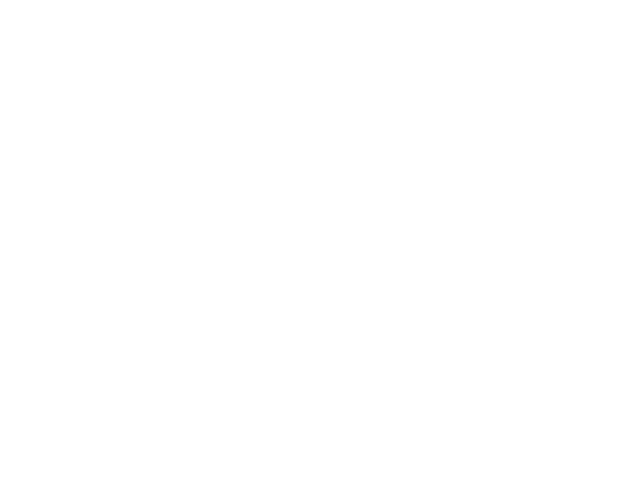

In [3]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Solution

In [4]:
import random 
import math
from random import randint

<IPython.core.display.Javascript object>


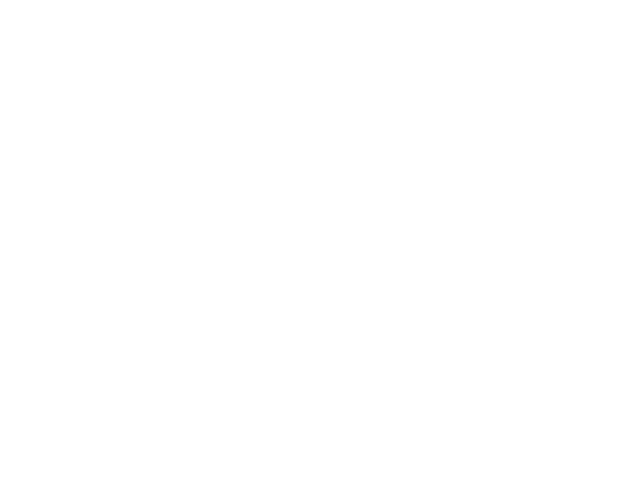

In [5]:
%matplotlib notebook
a = [(randint(-1000,1000), randint(-1000,1000)) for _ in range(10**5)]
Plot([PointsCollection(a)]).draw()

<IPython.core.display.Javascript object>


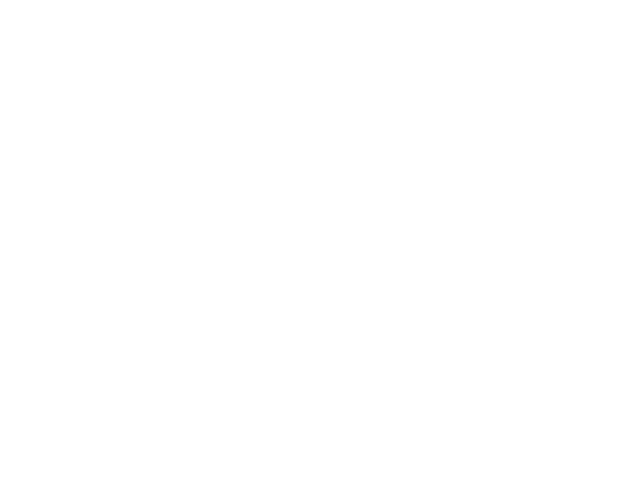

In [6]:
%matplotlib notebook
b = [(randint(-10**14,10**14), randint(-10 **14,10**14)) for _ in range(10**5)]
Plot([PointsCollection(b)]).draw()

<IPython.core.display.Javascript object>


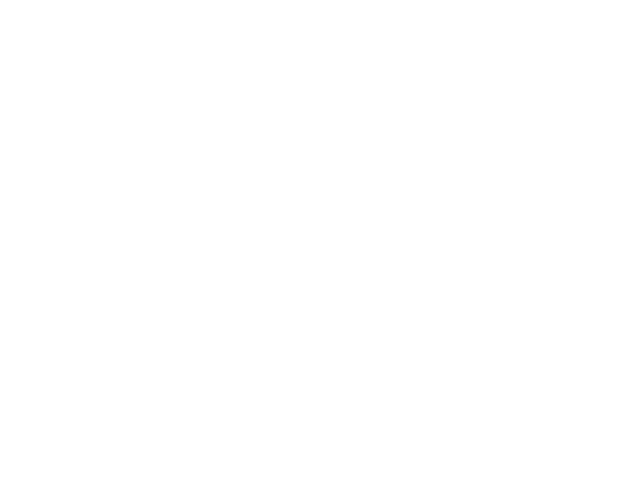

In [7]:
%matplotlib notebook
r = 100
c = []
for _ in range(1000):
    t = random.random() * (2*math.pi)
    c.append((r*math.sin(t), r*math.cos(t)))

Plot([PointsCollection(c)]).draw()

<IPython.core.display.Javascript object>


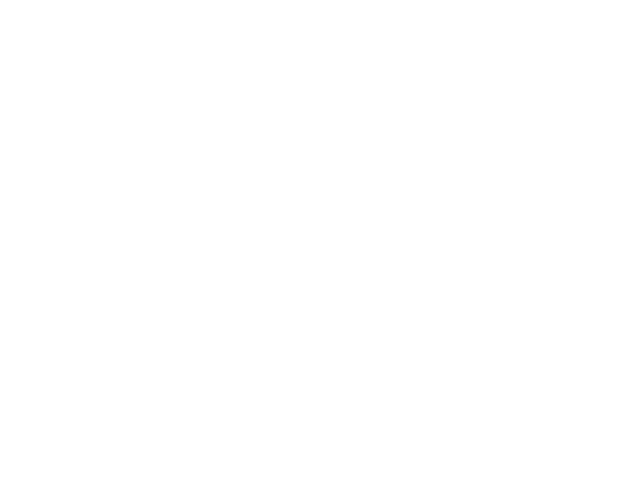

In [8]:
%matplotlib notebook
pa = [-1.0,0.0]
pb = [1.0,0.1]
d = []
for _ in range(1000):
    x = randint(-1000,1000)
    d.append((x, (pa[1]-pb[1])/(pa[0]-pb[0])*x+(pa[1]-(pa[1]-pb[1])/(pa[0]-pb[0])*pa[0])))
    
Plot([PointsCollection(d)]).draw()


In [9]:
def det1(a,b,c):
    return a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-c[0]*b[1]-a[1]*b[0]-a[0]*c[1]

In [10]:
def det2(a,b,c):
    return (a[0]-c[0])*(b[1]-c[1])-(a[1]-c[1])*(b[0]-c[0])

In [11]:
def classify(points, det, e=10**-14, a=(-1.0,0.0), b=(1.0,0.1)):
    ans = {
        'left':[],
        'right':[],
        'collinear':[]
    }
#     print("E",e)
    for p in points:
        d = det(a,b,p)
        if(d < -1*e):
            ans['left'].append(p)
        elif(d>e):
            ans['right'].append(p)
        else:
            ans['collinear'].append(p)
    return ans

In [12]:
def print_res(points, det, e=10**-14):
    ans = classify(points,det,e)
    points = [PointsCollection(ans['left'], color = 'blue'),
          PointsCollection(ans['right'], color = 'green'),
          PointsCollection(ans['collinear'], color = 'red')]
    Plot(points).draw()
    print("Left: ",len(ans['left']))
    print("Right: ",len(ans['right']))
    print("Collinear: ",len(ans['collinear']))

<IPython.core.display.Javascript object>


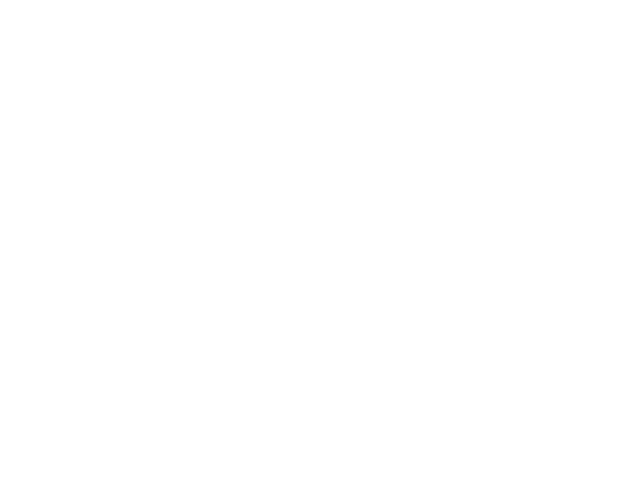

Left:  49897
Right:  50102
Collinear:  1


In [13]:
%matplotlib notebook
print_res(a, det1)

<IPython.core.display.Javascript object>


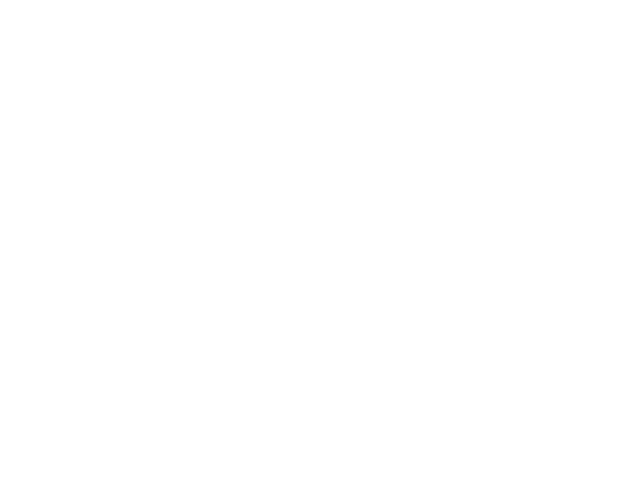

Left:  49897
Right:  50102
Collinear:  1


In [14]:
%matplotlib notebook
print_res(a,det2)

<IPython.core.display.Javascript object>


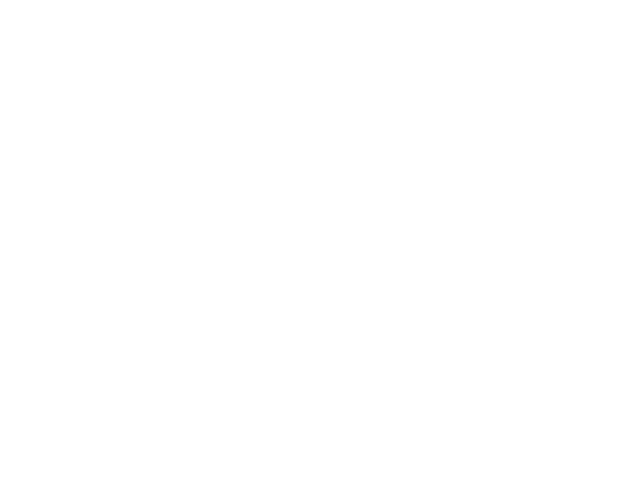

Left:  49709
Right:  50291
Collinear:  0


In [15]:
%matplotlib notebook
print_res(b,det1)

<IPython.core.display.Javascript object>


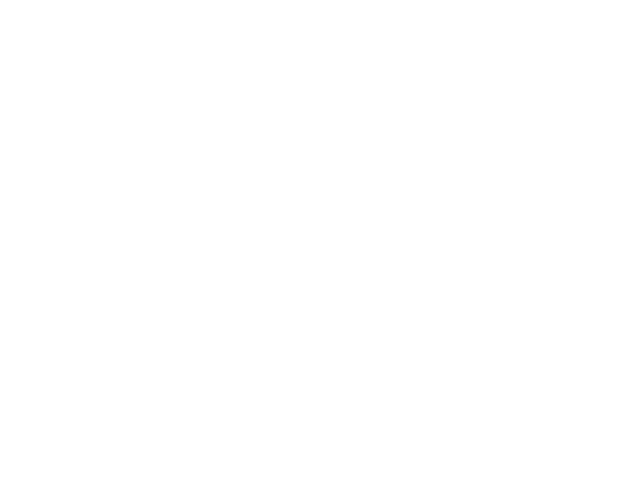

Left:  49708
Right:  50287
Collinear:  5


In [16]:
%matplotlib notebook
print_res(b,det2)

<IPython.core.display.Javascript object>


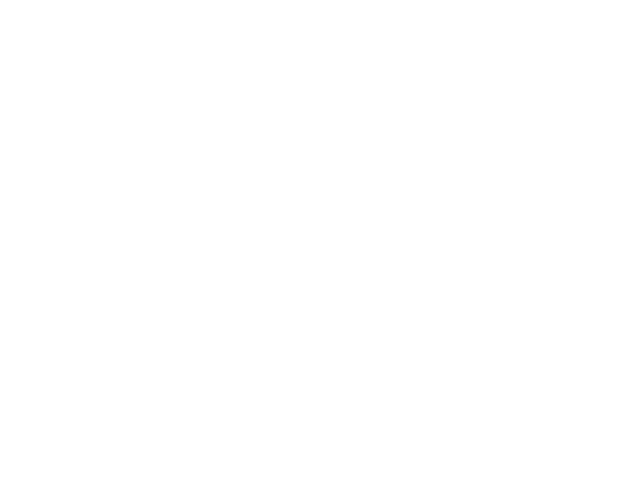

Left:  502
Right:  498
Collinear:  0


In [17]:
%matplotlib notebook
print_res(c,det1)

<IPython.core.display.Javascript object>


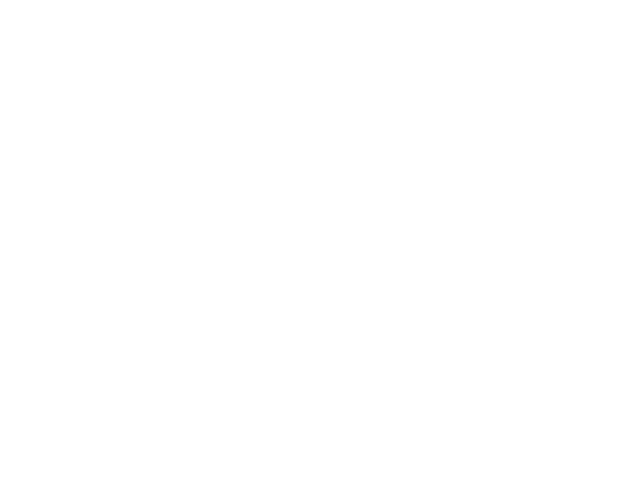

Left:  502
Right:  498
Collinear:  0


In [18]:
%matplotlib notebook
print_res(c,det2)

<IPython.core.display.Javascript object>


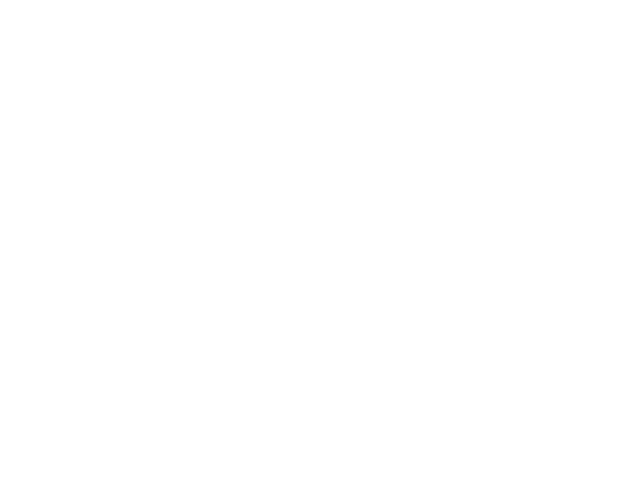

Left:  0
Right:  0
Collinear:  1000


In [19]:
%matplotlib notebook
print_res(d,det1)

<IPython.core.display.Javascript object>


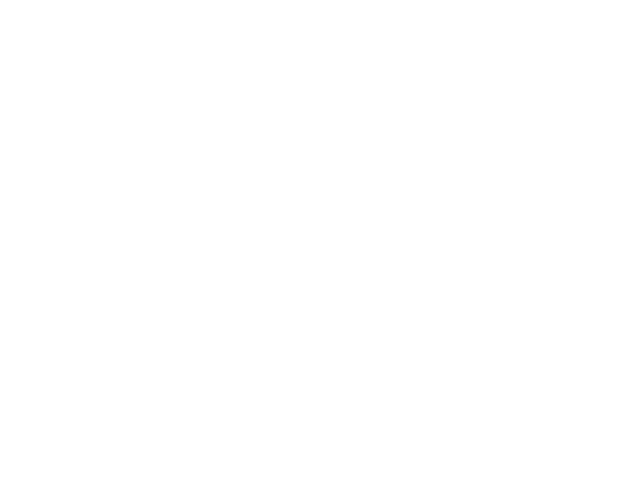

Left:  126
Right:  159
Collinear:  715


In [20]:
%matplotlib notebook
print_res(d,det2)

In [21]:
import numpy as np
def det_np3x3(a,b,c):
    arr = np.array([[a[0],a[1],1],[b[0],b[1],1],[c[0],c[1],1]])
    return np.linalg.det(arr)

In [22]:
import numpy as np
def det_np2x2(a,b,c):
    arr = np.array([[a[0]-c[0], a[1]-c[1]],[b[0]-c[0], b[1]-c[1]]])
    return np.linalg.det(arr)

<IPython.core.display.Javascript object>


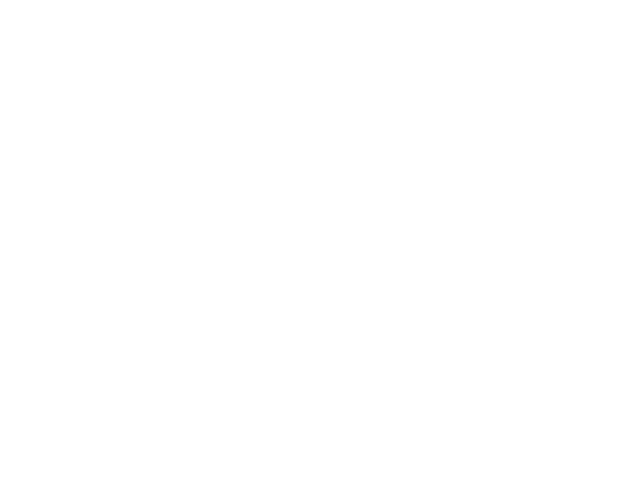

Left:  49897
Right:  50102
Collinear:  1


In [23]:
%matplotlib notebook
print_res(a,det_np2x2)

<IPython.core.display.Javascript object>


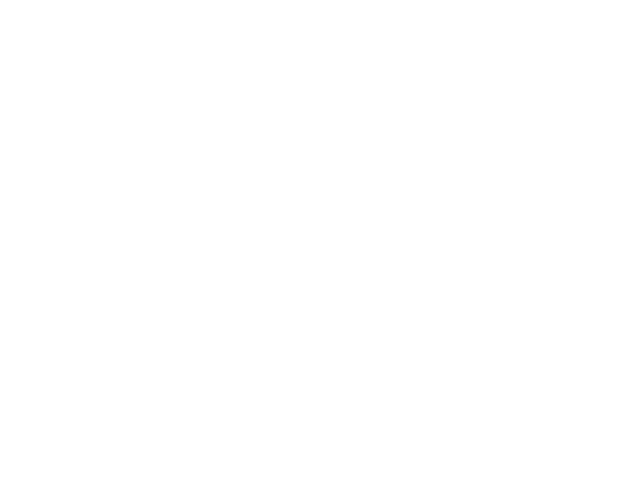

Left:  49897
Right:  50102
Collinear:  1


In [24]:
%matplotlib notebook
print_res(a,det_np3x3)

<IPython.core.display.Javascript object>


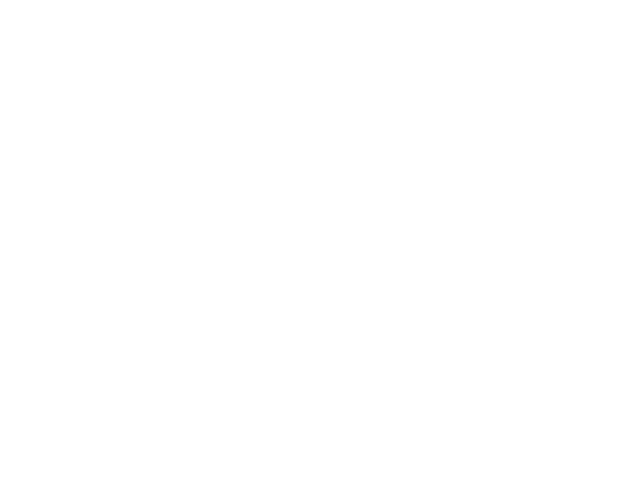

Left:  49711
Right:  50289
Collinear:  0


In [25]:
%matplotlib notebook
print_res(b,det_np2x2)

<IPython.core.display.Javascript object>


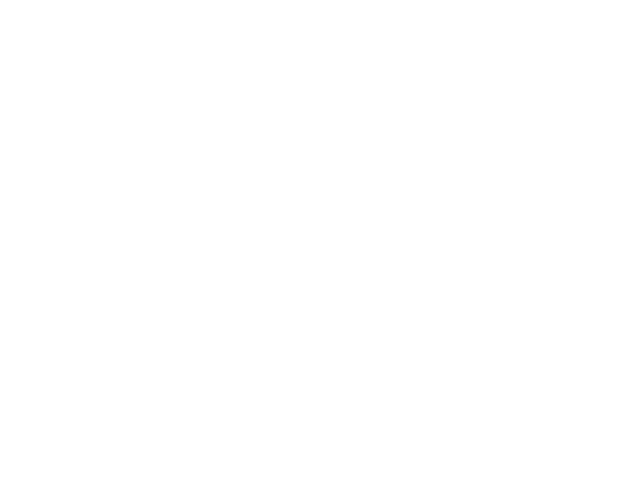

Left:  49709
Right:  50291
Collinear:  0


In [26]:
%matplotlib notebook
print_res(b,det_np3x3)

<IPython.core.display.Javascript object>


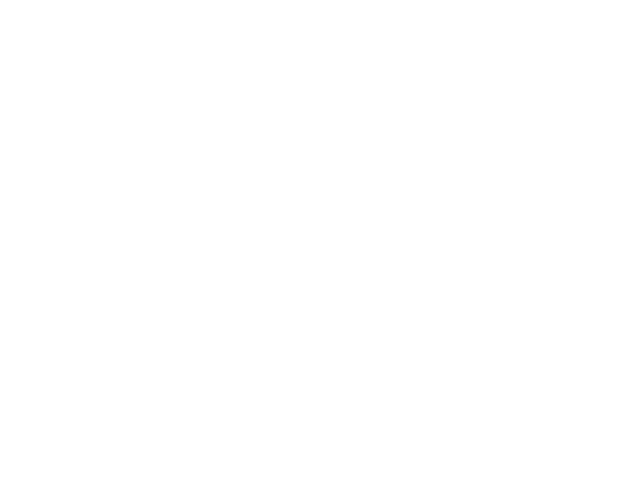

Left:  502
Right:  498
Collinear:  0


In [27]:
%matplotlib notebook
print_res(c,det_np2x2)

<IPython.core.display.Javascript object>


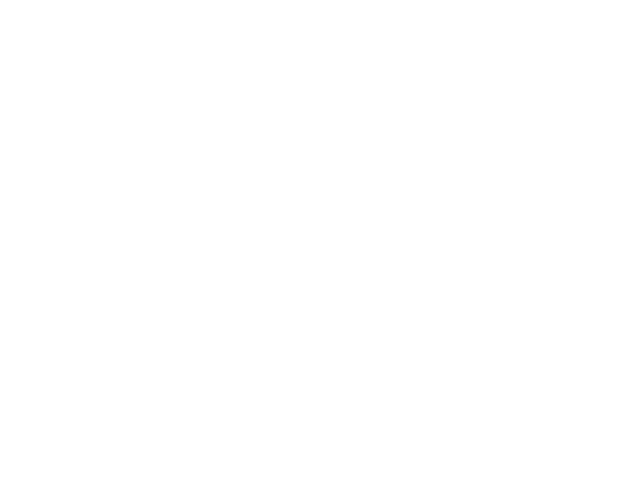

Left:  502
Right:  498
Collinear:  0


In [28]:
%matplotlib notebook
print_res(c,det_np3x3)

<IPython.core.display.Javascript object>


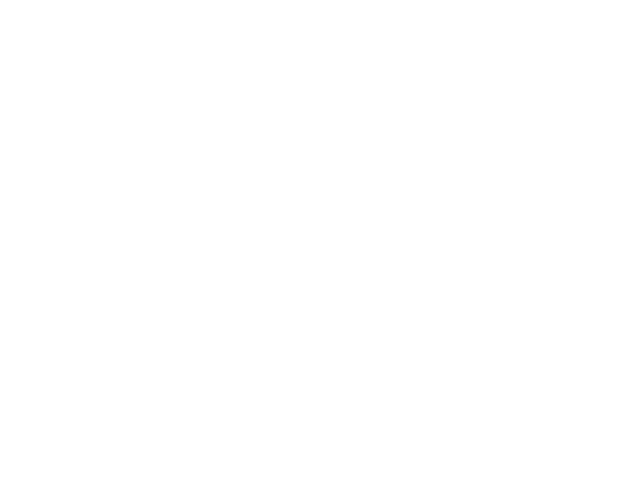

Left:  438
Right:  438
Collinear:  124


In [29]:
%matplotlib notebook
print_res(d,det_np2x2)

<IPython.core.display.Javascript object>


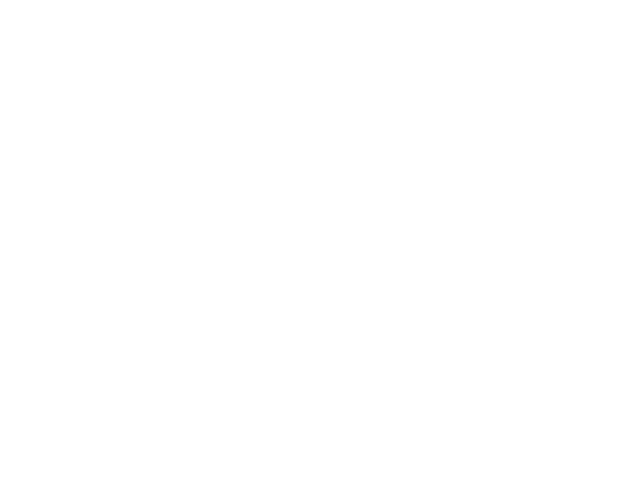

Left:  102
Right:  12
Collinear:  886


In [30]:
%matplotlib notebook
print_res(d,det_np3x3)

In [31]:
def merge_ans(ans,subset=['left','right','collinear'],char=['l','r','c']):
    res = [[x,char[0]] for x in ans[subset[0]]]
    res.extend([[x,char[1]] for x in ans[subset[1]]])
    res.extend([[x,char[2]] for x in ans[subset[2]]])
    return res

def count_differences(points, det1, det2, e=10**-14, number=True):
    ans1 = classify(points,det1,e)
    ans1_m = sorted(merge_ans(ans1))
    
    ans2 = classify(points,det2,e)
    ans2_m = sorted(merge_ans(ans2))
    result = (0 if number else [])
    for i in range(len(ans1_m)):
        if ans1_m[i][0] == ans2_m[i][0] and ans1_m[i][1]!=ans2_m[i][1]:
            if number:
                result+=1
            else:
                result.append(ans1_m[i][0])
    return result

In [32]:
count_differences(b,det1,det_np3x3)

0

In [33]:
count_differences(b,det2,det_np2x2)

5

In [34]:
count_differences(d,det1,det_np3x3)

114

In [35]:
count_differences(d,det2,det_np2x2)

649

<IPython.core.display.Javascript object>


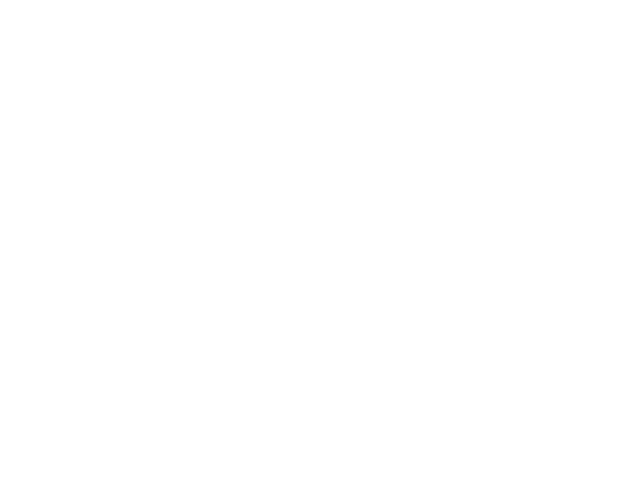

In [36]:
%matplotlib notebook
Plot([PointsCollection(count_differences(b,det2,det_np2x2, number=False))]).draw()

<IPython.core.display.Javascript object>


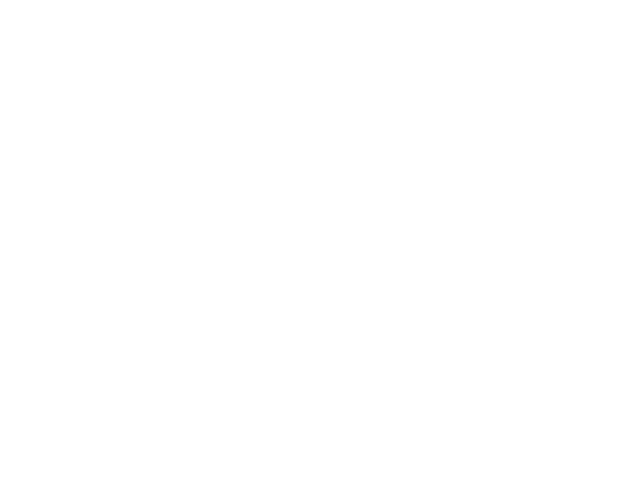

In [37]:
%matplotlib notebook
Plot([PointsCollection(count_differences(d,det2,det_np2x2, number=False))]).draw()

<IPython.core.display.Javascript object>


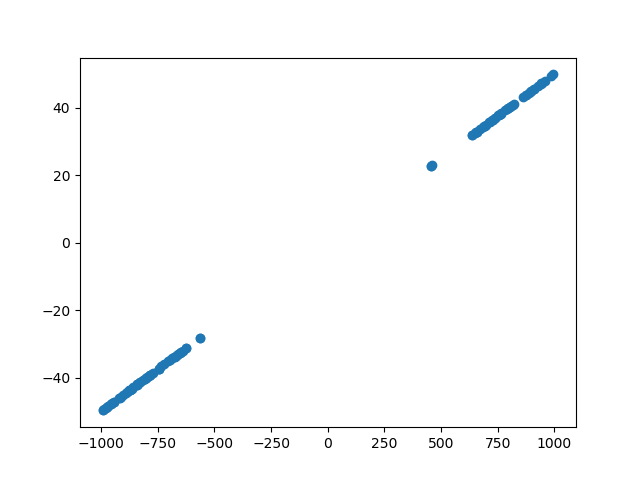

In [38]:
%matplotlib notebook
Plot([PointsCollection(count_differences(d,det1,det_np3x3, number=False))]).draw()

# Performance tests

In [39]:
import time
start_time = time.time()
classify(b,det_np3x3)
print("--- %s seconds ---" % (time.time() - start_time))


start_time = time.time()
classify(b,det1)
print("--- %s seconds ---" % (time.time() - start_time))



--- 0.8229050636291504 seconds ---
--- 0.07800126075744629 seconds ---
